In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# upload the data

df=pd.read_csv("togo-dapaong_qc.csv")

1. Summary Statistics & Missing-Value Report

In [4]:
# Describe the numerical columns
print(df.describe())
print("----------------------------------------")
# Find null values
print(df.isna().sum())
print("----------------------------------------")
# Check the data types
df.info()
# Change Date to datetime type
df["date"]=pd.to_datetime(df["Timestamp"])


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [5]:
#Find which columns have high null counts
def high_null_columns(df):
  null_count=df.isnull().sum()
  high_null_count=null_count[null_count/len(df)>0.05]
  return high_null_count
print("The columns with high null counts are:")
print(high_null_columns(df))
#drop columns with high null counts
df = df.drop('Comments', axis=1)
df.head()

The columns with high null counts are:
Comments    525600
dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,date
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,2021-10-25 00:01:00
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,2021-10-25 00:02:00
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,2021-10-25 00:03:00
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,2021-10-25 00:04:00
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,2021-10-25 00:05:00


2. Outlier Detection & Basic Cleaning

In [6]:
#Compute Z-score
columns=["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
zscores=np.abs(stats.zscore(df[columns]))
outliers=(zscores>3).any(axis=1)
print(f"Flagged samples = {outliers.sum(axis=0)}")

#Decide to drop or impute
Percentange_outliers=outliers.sum(axis=0)*100/len(df)
print(f"{Percentange_outliers} %")



Flagged samples = 9251
1.7600837138508372 %


In [7]:
#export cleaned data into csv
df.to_csv('togo_clean.csv', index=False)

3. Time Series Analysis

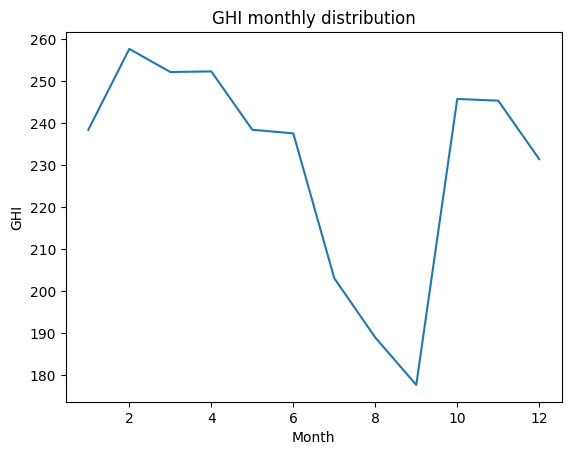

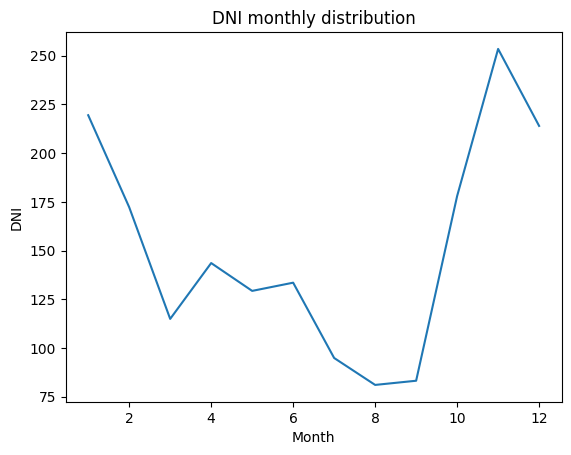

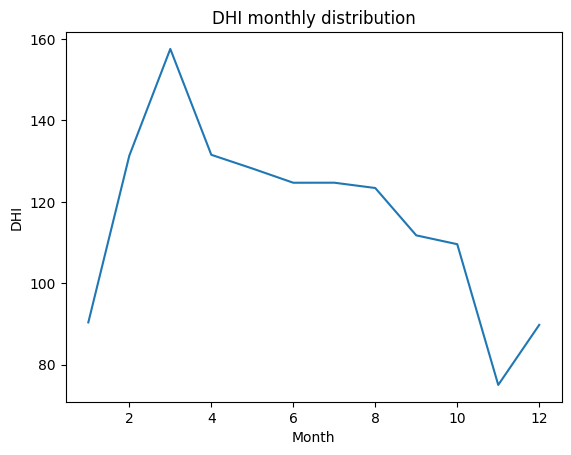

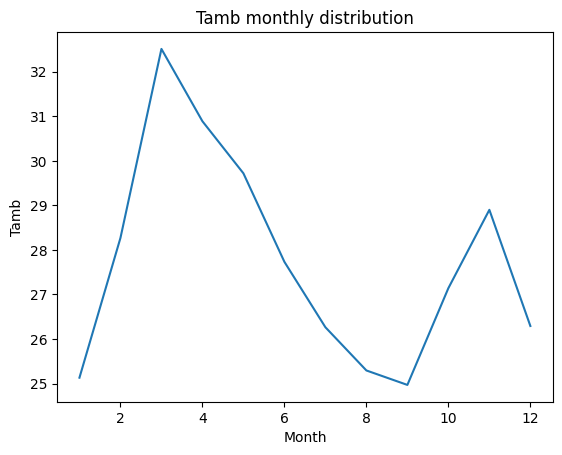

In [8]:
#Prepare key columns for time series analysis
key_columns=["GHI", "DNI", "DHI", "Tamb"]
df["month"]=df["date"].dt.month
#Group by Month
y1=df.groupby('month')[key_columns].mean()
x1=pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12])
#Time Series Graphs for Each Month
for col in key_columns:
 plt.plot(x1,y1[col])
 plt.title(f"{col} monthly distribution")
 plt.xlabel("Month")
 plt.ylabel(col)
 plt.show()

5. Correlation & Relationship Analysis

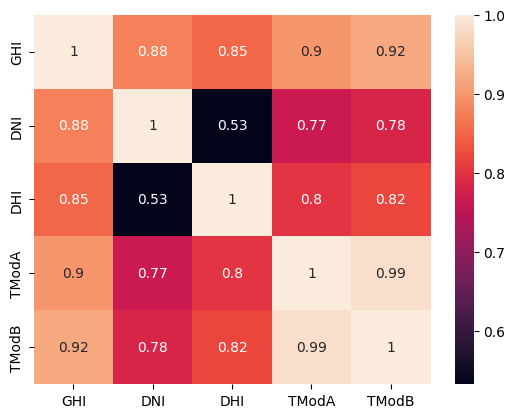

In [9]:
#prepare the columns
cols=["GHI", "DNI", "DHI", "TModA", "TModB"]
#Calculate the correlation between these values
corr=df[cols].corr()
#Draw the heat map
sns.heatmap(corr,annot=True)
plt.show()

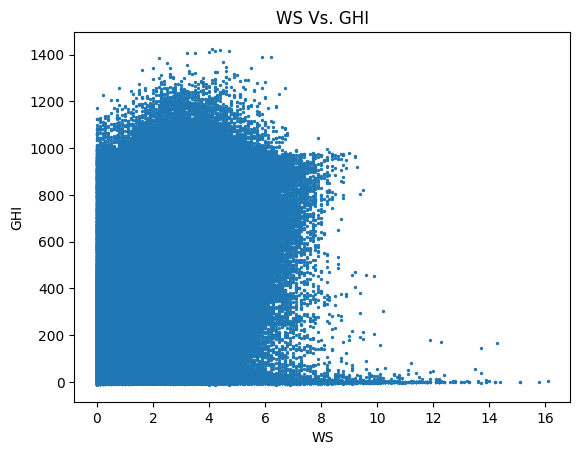

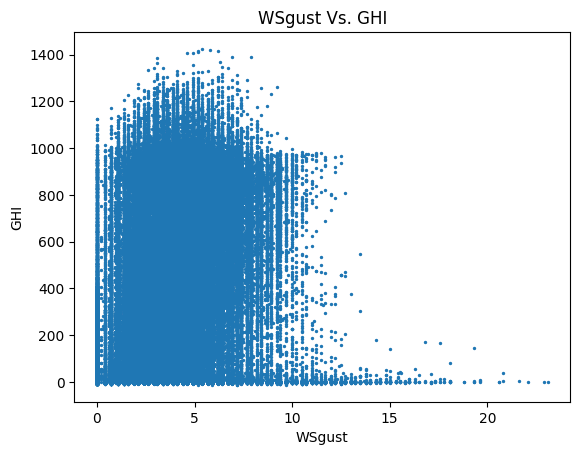

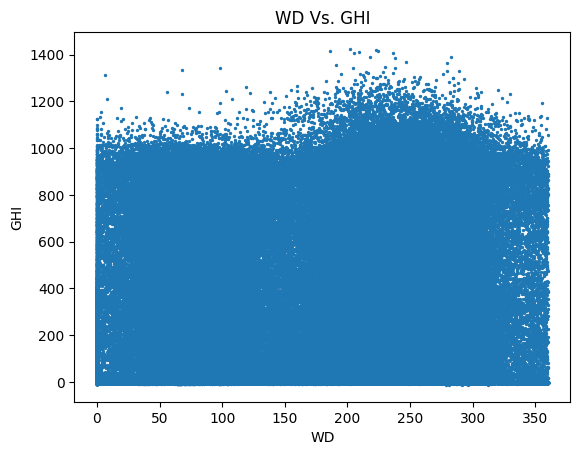

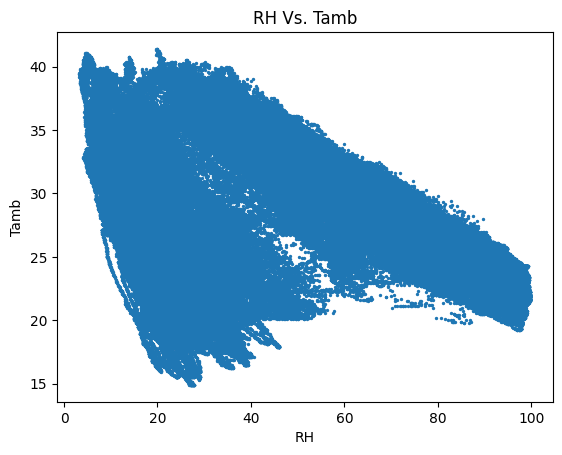

In [10]:
#Draw Scatterplots for various graphs
plt.scatter(df["WS"],df["GHI"],s=2)
plt.title('WS Vs. GHI')
plt.xlabel("WS")
plt.ylabel("GHI")
plt.show()
plt.scatter(df["WSgust"],df["GHI"],s=2)
plt.title('WSgust Vs. GHI')
plt.xlabel("WSgust")
plt.ylabel("GHI")
plt.show()

plt.scatter(df["WD"],df["GHI"],s=2)
plt.title('WD Vs. GHI')
plt.xlabel("WD")
plt.ylabel("GHI")
plt.show()

plt.scatter(df["RH"],df["Tamb"],s=2)
plt.title('RH Vs. Tamb')
plt.xlabel("RH")
plt.ylabel("Tamb")
plt.show()


6. Wind & Distribution Analysis

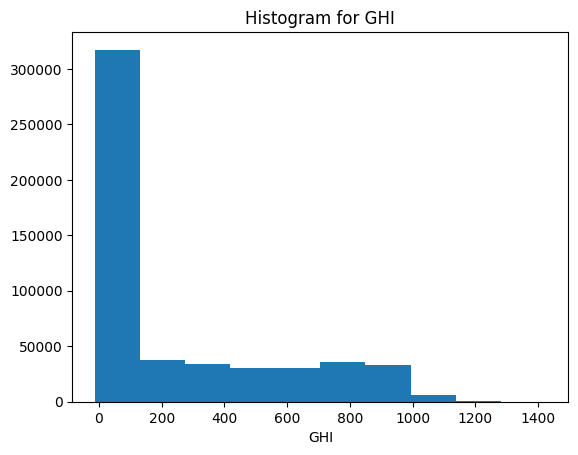

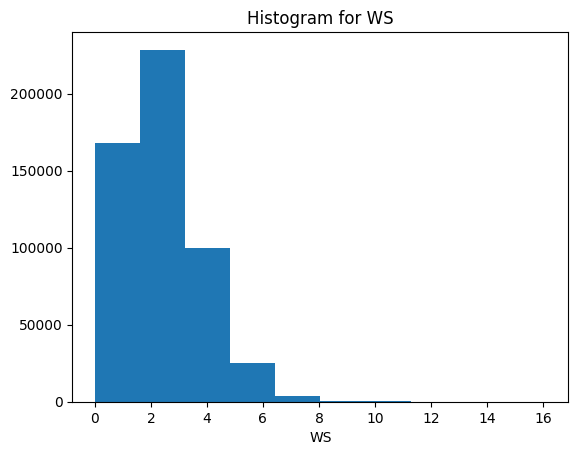

In [11]:
#Draw Histograms for different variables
plt.hist(df["GHI"])
plt.title('Histogram for GHI')
plt.xlabel("GHI")
plt.show()

plt.hist(df["WS"])
plt.title('Histogram for WS')
plt.xlabel("WS")
plt.show()

7. Temperature Analysis

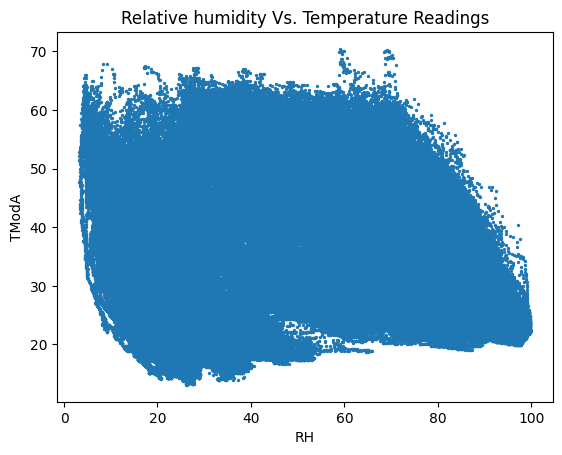

In [12]:
# Effect of relative humidity on temperature readings
plt.scatter(df["RH"],df["TModA"],s=2)
plt.title('Relative humidity Vs. Temperature Readings')
plt.xlabel("RH")
plt.ylabel("TModA")
plt.show()

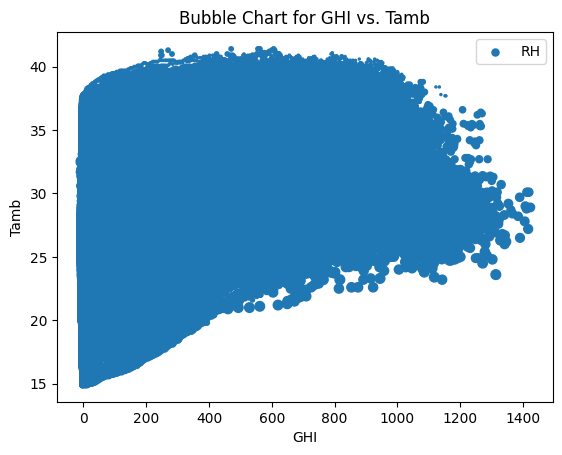

In [13]:
#Bubble Chart
plt.scatter(df["GHI"],df["Tamb"],s=df["RH"]*0.5,label="RH")
plt.title('Bubble Chart for GHI vs. Tamb')
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.legend()
plt.show()